In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [6]:
image = cv.imread("/home/dima/Documents/альбрехт/обработка изображений/default/images/Img (copy 7).png")

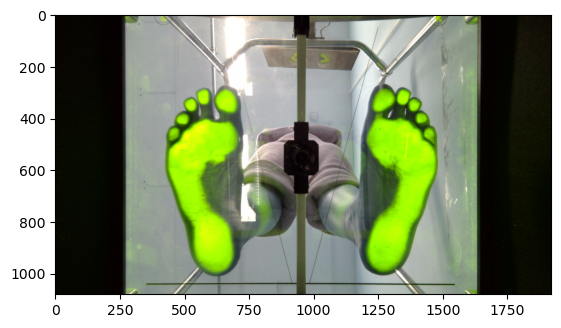

In [9]:
plt.imshow(image)

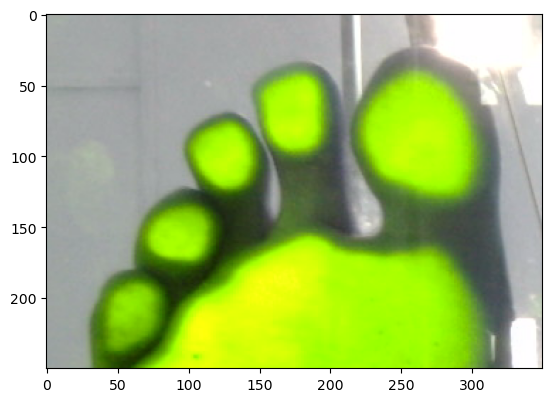

In [8]:
# plt.imshow(image)

plt.imshow(image[250:500, 400:750])

In [5]:
mask = cv.imread("/home/dima/Documents/альбрехт/обработка изображений/default/Img (copy 7)_GT.bmp", flags=cv.IMREAD_GRAYSCALE)

In [6]:
threshold, mask = cv.threshold(mask, 38, 255, cv.THRESH_BINARY_INV)

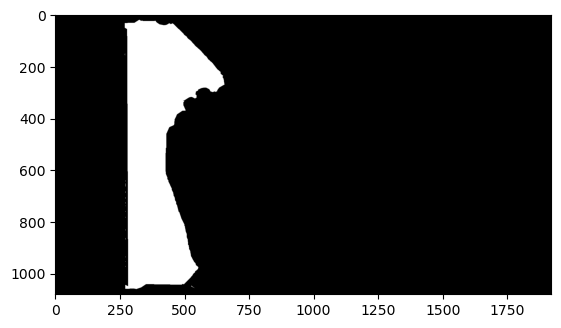

In [7]:
plt.imshow(mask, 'gray')

In [8]:
maskbw = mask / 255
maskbw = maskbw.astype(np.uint8, copy=False)

maskbw = np.expand_dims(maskbw, 2)
maskbw = np.repeat(maskbw, 3, axis=2)

maskbw.shape

(1080, 1920, 3)

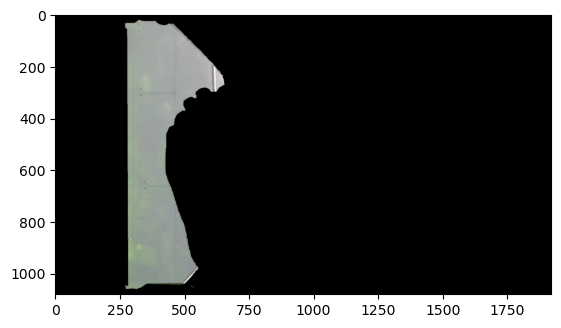

In [9]:
maskedImage = image * maskbw
plt.imshow(maskedImage)

/tmp/ipykernel_1400/3235104848.py:12: RuntimeWarning: divide by zero encountered in log
  ax.plot(bin_edges[0:-1], np.log(histogram), color=color)


Text(0, 0.5, 'Pixel count')

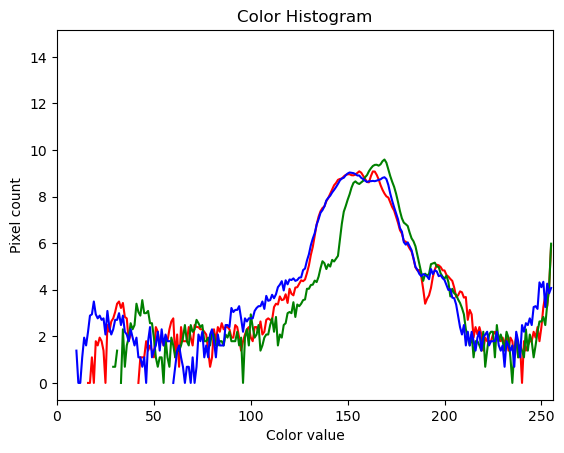

In [10]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        maskedImage[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax.plot(bin_edges[0:-1], np.log(histogram), color=color)

ax.set_title("Color Histogram")
ax.set_xlabel("Color value")
ax.set_ylabel("Pixel count")

In [11]:
maskedImageHsv = cv.cvtColor(image, cv.COLOR_RGB2HSV) * maskbw

/tmp/ipykernel_1400/1727569309.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(bins[0:-1], np.log(hist))


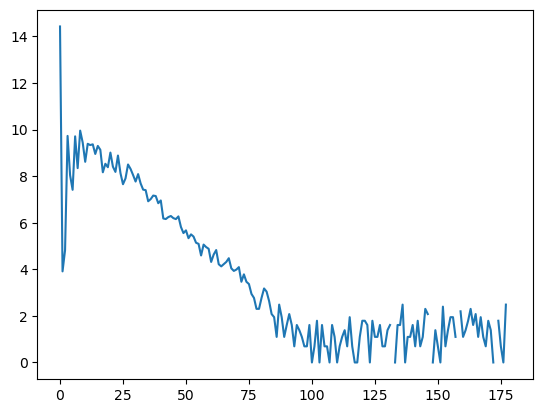

In [14]:
hist, bins = np.histogram(maskedImageHsv[:,:,1], bins=180, range=(0., 180.))
plt.plot(bins[0:-1], np.log(hist))

/tmp/ipykernel_1400/2111721508.py:12: RuntimeWarning: divide by zero encountered in log
  ax.plot(bin_edges[0:-1], np.log(histogram), color=color, label=name)


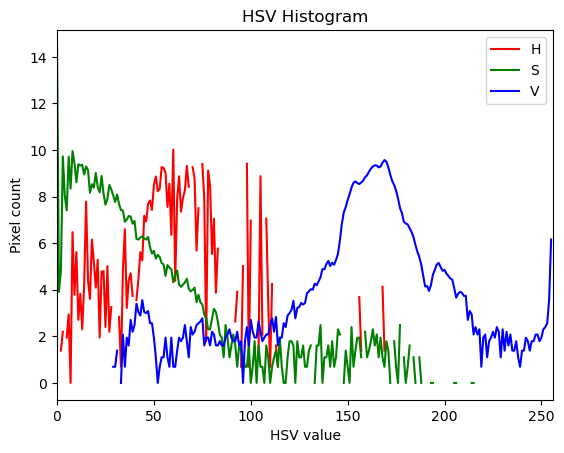

In [22]:
# tuple to select colors of each channel line
colors = (("red", "H", 180), ("green", "S", 255), ("blue", "V", 255))

# create the histogram plot, with three lines, one for
# each color
fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for channel_id, (color, name, limit) in enumerate(colors):
    histogram, bin_edges = np.histogram(
        maskedImageHsv[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax.plot(bin_edges[0:-1], np.log(histogram), color=color, label=name)

ax.set_title("HSV Histogram")
ax.set_xlabel("HSV value")
ax.set_ylabel("Pixel count")
ax.legend()

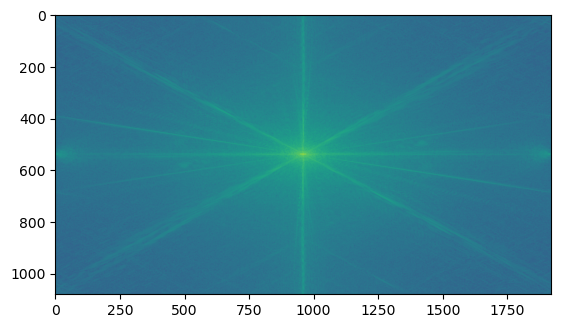

In [67]:
# np.fft.rfft(maskedImageHsv[:,:,0])
imageFft = np.fft.fft2(image[:,:,1])
imageFft = np.fft.fftshift(imageFft)
# np.fft.fftfreq(
plt.imshow(np.log(np.abs(imageFft)))